# DOTA 2 Surrogate 

In [16]:
import pandas as pd
import numpy as np

import glob
import matplotlib.pyplot as plt
from joblib import dump, load

## File size stats

In [365]:
files = glob.glob("games_data/*")

df = pd.read_csv(files[0], index_col=0)
desc = df.describe()
x = (desc.loc["std"]==0).astype(int)

for i in range(30):
    df = pd.read_csv(files[i], index_col=0)
    desc = df.describe()
    x = x * (desc.loc["std"]==0).astype(int)
    print(sum(x))

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [374]:
import json
with open('features_list.json', 'r') as fp:
    features_list = json.load(fp)
features_list

{'0': 'team',
 '1': 'level',
 '2': 'health',
 '3': 'max health',
 '4': 'health regen',
 '5': 'mana',
 '6': 'max mana',
 '7': 'mana regen',
 '8': 'base move speed',
 '9': 'current move speed',
 '10': 'base damage',
 '11': 'damage variance',
 '12': 'attack damage',
 '13': 'attack range buffer',
 '14': 'attack speed',
 '15': 'seconds per attack',
 '16': 'attack animation point',
 '17': 'last attack time',
 '18': 'attack target',
 '19': 'strength',
 '20': 'agility',
 '21': 'intellect',
 '22': 'gold',
 '23': 'net worth',
 '24': 'last hits',
 '25': 'denies',
 '26': 'location 1',
 '27': 'location 2',
 '28': 'facing',
 '29': 'vision range',
 '30': 'opp team',
 '31': 'opp level',
 '32': 'opp health',
 '33': 'opp max health',
 '34': 'opp health regen',
 '35': 'opp mana',
 '36': 'opp max mana',
 '37': 'opp mana regen',
 '38': 'opp base move speed',
 '39': 'opp curr move speed',
 '40': 'opp base damage',
 '41': 'opp damage variance',
 '42': 'opp attack damage',
 '43': 'opp attack range buffer',
 '

In [416]:
df = pd.read_csv(files[1], index_col=0)
df = df.drop(columns='action')
df.columns=features_list.values()
desc = df.describe()
desc

,team,level,health,max health,health regen,mana,max mana,mana regen,base move speed,current move speed,...,opp ability 5 target type,opp ability 5 behavior,opp ability 6 level,opp ability 6 mana cost,opp ability 6 ability damage,opp ability 6 cast range,opp ability 6 cooldown time remaining,opp ability 6 target type,opp ability 6 behavior,item flask
count,9032.0,9032.000000,9032.000000,9032.000000,9032.000000,9032.000000,9032.000000,9032.000000,9032.0,9032.0,...,9032.0,9032.0,9032.0,9032.0,9032.0,9032.0,9032.0,9032.0,9032.0,9032.000000
mean,2.0,1.305359,599.128986,683.188663,8.892157,190.790620,352.603632,3.634084,305.0,0.0,...,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,-0.657440
std,0.0,0.513555,189.076704,30.140421,13.351995,112.411287,17.166600,6.318852,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.753548
min,2.0,1.000000,0.000000,600.000000,2.250000,1.000000,303.000000,1.250000,305.0,0.0,...,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,-1.000000
25%,2.0,1.000000,660.000000,660.000000,2.650000,84.055243,339.000000,1.400000,305.0,0.0,...,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,-1.000000
50%,2.0,1.000000,660.000000,680.000000,3.650000,187.000015,351.000000,1.450000,305.0,0.0,...,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,-1.000000
75%,2.0,2.000000,680.000000,720.000000,5.650000,296.000000,375.000000,1.560000,305.0,0.0,...,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,-1.000000
max,2.0,3.000000,780.000000,780.000000,78.919998,399.000000,399.000000,25.609999,305.0,0.0,...,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [400]:
print("Are constant:")
for i, v in x.items():
    if v==1:
        print("-", i, '\t', features_list[i], end='      ')
        print(desc [features_list[i]]['mean'])

Are constant:
- 0 	 team      2.0
- 8 	 base move speed      305.0
- 9 	 current move speed      0.0
- 11 	 damage variance      9.0
- 13 	 attack range buffer      250.0
- 16 	 attack animation point      0.5
- 25 	 denies      0.0
- 30 	 opp team      3.0
- 38 	 opp base move speed      305.0
- 39 	 opp curr move speed      0.0
- 41 	 opp damage variance      9.0
- 43 	 opp attack range buffer      250.0
- 46 	 opp attack animation point      0.5
- 57 	 good tower team      2.0
- 59 	 good tower max health      1800.0
- 61 	 good tower attack range buffer      250.0
- 62 	 good tower attack speed      1.0
- 63 	 bad tower team      3.0
- 65 	 bad tower max health      1800.0
- 67 	 bad tower attack range buffer      250.0
- 68 	 bad tower attack speed      1.0
- 69 	 bounty 1 location 1      -69.0
- 70 	 bounty 1 location 2      -70.0
- 71 	 bounty 2 location 1      -71.0
- 72 	 bounty 2 location 2      -72.0
- 73 	 bounty 3 location 1      -73.0
- 74 	 bounty 3 location 2      -74.0

-- mana --
count    9032.000000
mean      190.790620
std       112.411287
min         1.000000
25%        84.055243
50%       187.000015
75%       296.000000
max       399.000000
Name: mana, dtype: float64


Text(0.5, 0, 'Record #')

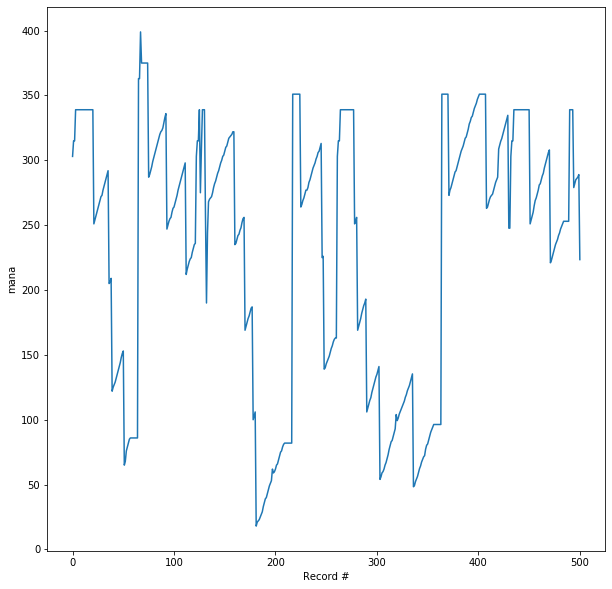

In [428]:
feature = 'mana'

print("-- %s --" %feature)
print(desc[feature])
df = df.loc[:500]
plt.figure(figsize=(10, 10))
plt.plot(range(len(df)), df[feature])
plt.ylabel(feature)
plt.xlabel("Record #")

In [436]:
df1 = pd.read_csv("games_data/rd_cumulated_1.csv")
df2 = pd.read_csv("games_data/rd_cumulated_2.csv")
print(len(df1) + len(df2))

26120
